Phase 1 


-Identify and confirm dataset (https://arxiv.org/abs/2108.05080)



#usage citation :
@inproceedings{

khalid2021fakeavceleb,

title={Fake{AVC}eleb: A Novel Audio-Video Multimodal Deepfake Dataset},

author={Hasam Khalid and Shahroz Tariq and Minha Kim and Simon S. Woo},

booktitle={Thirty-fifth Conference on Neural Information Processing Systems Datasets and Benchmarks Track (Round 2)},

year={2021},

url={https://openreview.net/forum?id=TAXFsg6ZaOl}

}

In [9]:
#how to extract audiofiles from mp4 files(datatype used in video)
import moviepy.editor as mp
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import winsound
import librosa 
import librosa.display
import IPython.display as ipd


In [3]:
#visually compare fake audio vs real audio for two video clips



#source information
fakeSampleLoc='C:\\Users\\cumminan\\SampleAudioFiles\\Fake\\00280_fake.mp4'
realSampleLoc='C:\\Users\\cumminan\\SampleAudioFiles\\Real\\00280.mp4'
fakeClip=mp.VideoFileClip(fakeSampleLoc)
realClip=mp.VideoFileClip(realSampleLoc)


#extract audio

fakeClip.audio.write_audiofile(r"fakeClip.wav")
realClip.audio.write_audiofile(r"realClip.wav")

MoviePy - Writing audio in fakeClip.wav


MoviePy - Done.
MoviePy - Writing audio in realClip.wav


MoviePy - Done.


In [3]:
#play real file
winsound.PlaySound('realClip.wav',winsound.SND_FILENAME)

In [24]:
#play fake file
winsound.PlaySound('fakeClip.wav',winsound.SND_FILENAME)

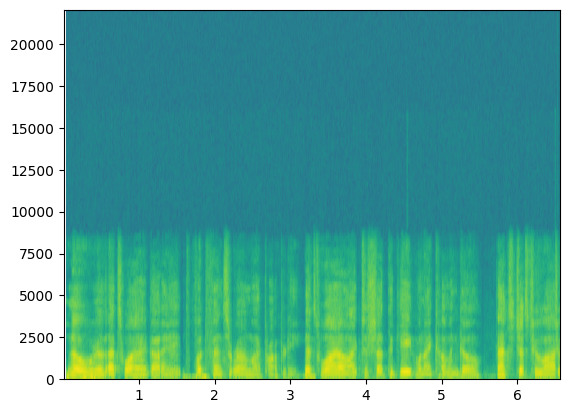

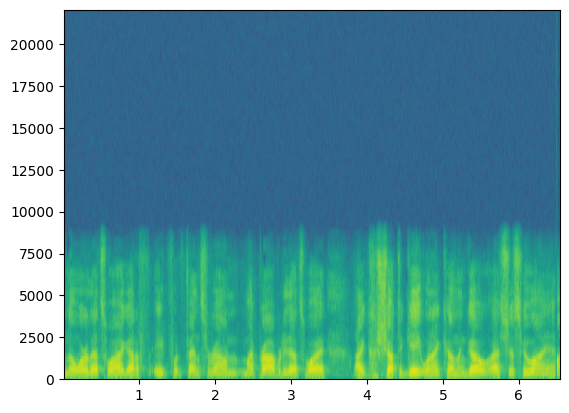

In [9]:
#generate spectrograms with Sample Rate and Audio
SR, AU=wavfile.read("fakeClip.wav")
SR1,AU1=wavfile.read('realClip.wav')
AU=AU[:,0]
AU1=AU1[:,0]
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(AU, Fs=SR)
plt.title("Fake Audio")
plt.show()
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(AU1, Fs=SR1)
plt.title("Real Clip")
plt.show()

[Text(0.5, 1.0, 'log Power spectrogram')]

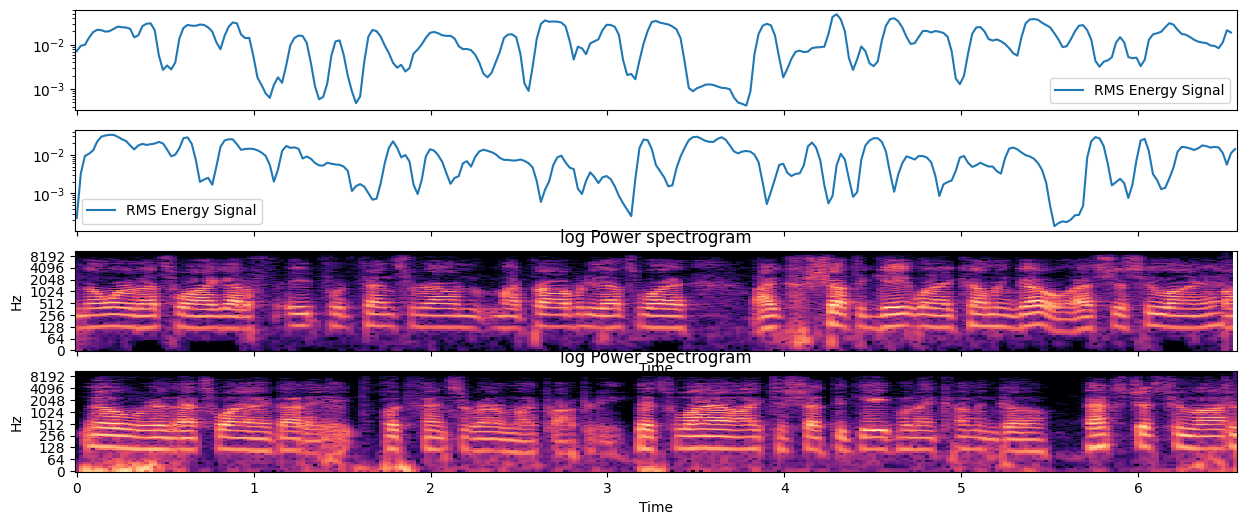

In [20]:
#generate initial surface derived features for real audio file

audioR='realClip.wav'
audioF='fakeClip.wav'
y, sr = librosa.load(audioR)
yF, srF = librosa.load(audioF)# Get RMS value from each frame's magnitude value

S, phase = librosa.magphase(librosa.stft(y))
SF, phaseF = librosa.magphase(librosa.stft(yF))
rms = librosa.feature.rms(S=S)
rmsF = librosa.feature.rms(S=SF)# Plot the RMS energy

fig, ax = plt.subplots(figsize=(15, 6), nrows=4, sharex=True)

times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy Signal')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
times = librosa.times_like(rmsF)
ax[1].semilogy(times, rmsF[0], label='RMS Energy Signal')
ax[1].set(xticks=[])
ax[1].legend()
ax[1].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='log Power spectrogram')

librosa.display.specshow(librosa.amplitude_to_db(SF, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[3])

ax[3].set(title='log Power spectrogram')

-Familiarize myself with VSCode-Remote GPU environment used in Video Deepfake project


-Ingest and transform and split data


-select model(s) to implement


-select features for training


-train model


-evaluate model


-perform data augmentation


-retrain and revaluate model
